In [1]:
from ml_pipe.week_data_prep import generate_input_data
import pandas as pd
import numpy as np
import os

In [2]:
%%time

week_off_def, week_data, X_y_train = generate_input_data(1, 1, train=True)

/Users/andrewbakert/Documents/nfl_big_data/NFL_Pass_Pred/ml_pipe/week_data_prep.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_play['time_diff'][week_play['time_diff'].isnull()] = pd.Timedelta(0)


CPU times: user 48.9 s, sys: 5.62 s, total: 54.5 s
Wall time: 54.8 s


In [13]:
off = week_off_def[week_off_def['off']]
defense = week_off_def[~week_off_def['off']]
off['x_behind_line'].max()

-0.010000000000005116

(array([2.7800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3900e+02,
        0.0000e+00, 1.3900e+02, 0.0000e+00, 0.0000e+00, 1.3900e+02,
        0.0000e+00, 1.3900e+02, 0.0000e+00, 0.0000e+00, 1.3900e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.6000e+01, 7.2000e+01, 2.1000e+02, 4.1000e+02,
        1.4200e+02, 5.0600e+02, 1.1860e+03, 2.3940e+03, 2.8900e+03,
        6.9910e+03, 8.7420e+03, 1.3044e+04, 1.6299e+04, 1.3437e+04,
        1.1780e+04, 1.2717e+04, 1.7241e+04, 2.4933e+04, 3.1932e+04,
        5.1141e+04, 8.7401e+04, 4.7340e+04, 5.1621e+04, 9.2389e+04]),
 array([-57.98  , -56.8204, -55.6608, -54.5012, -53.3416, -52.182 ,
        -51.0224, -49.8628, -48.7032, -47.5436, -46.384 , -45.2244,
        -44.0648, -42.9052, -41.7456, -40.586 , -39.4264, -38.2668,
        -37.1072, -35.9476, -34.788 , -33.6284, -32.4688, -31.3092,
        -30.1496, -28.99  , -27.8304, -26.6708

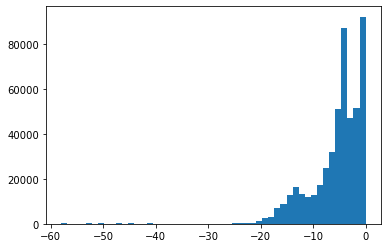

In [15]:
import matplotlib.pyplot as plt

plt.hist(defense['x_behind_line'].values, bins=50)

In [22]:
defense.sort_values(['gameId', 'playId', 'position_num', 'time'], inplace=True)
defense['x_starting'] = defense.groupby(['gameId', 'playId', 'position_num'])['x'].transform(lambda x: x.iloc[0])

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/6v/8jcf0jcn7_vfm2q2r4tz44gh0000gn/T/ipykernel_35916/3862282143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense['x_starting'] = defense.groupby(['gameId', 'playId', 'position_num'])['x'].transform(lambda x: x.iloc[0])


In [ ]:
de

In [16]:
group = week_data.reset_index(drop=True).groupby(['playId', 'gameId', 'position_num'])[['y_starting', 'x_behind_line']].first().reset_index()
group.pivot_table(values=['y_starting', 'x_behind_line'], columns=['position_num'], index=['playId', 'gameId']).max()

               position_num
x_behind_line  CB1             -0.04
               CB2             -0.25
               CB3             -0.03
               CB4             -0.49
               DB1             -0.29
                               ...  
y_starting     TE3             37.30
               WR1             48.05
               WR2             45.62
               WR3             46.44
               WR4             44.60
Length: 68, dtype: float64

In [18]:
week_data.groupby(['off'])['x_behind_line'].min()

off
True   -9.19
Name: x_behind_line, dtype: float64

In [3]:
X_train = X_y_train.drop(['x', 'y'], axis=1)
y_train = X_y_train[['x', 'y']]

In [4]:
X_train.columns

Index(['position_num', 'x_behind_line', 'y_starting', 'yardsToGo',
       'yards_needed_touch', 'time_acc_s', 'yardline_first',
       'x_behind_line_CB1', 'x_behind_line_CB2', 'x_behind_line_CB3',
       'x_behind_line_CB4', 'x_behind_line_CB5', 'x_behind_line_DB1',
       'x_behind_line_DB2', 'x_behind_line_DE1', 'x_behind_line_DE2',
       'x_behind_line_DE3', 'x_behind_line_DL1', 'x_behind_line_DT1',
       'x_behind_line_FS1', 'x_behind_line_FS2', 'x_behind_line_FS3',
       'x_behind_line_IL1', 'x_behind_line_IL3', 'x_behind_line_IL4',
       'x_behind_line_K0', 'x_behind_line_LB1', 'x_behind_line_LB2',
       'x_behind_line_LS1', 'x_behind_line_ML1', 'x_behind_line_ML3',
       'x_behind_line_NT1', 'x_behind_line_OL1', 'x_behind_line_OL3',
       'x_behind_line_OL4', 'x_behind_line_OL6', 'x_behind_line_OL7',
       'x_behind_line_P0', 'x_behind_line_S0', 'x_behind_line_SS1',
       'x_behind_line_SS2', 'x_behind_line_SS3', 'x_behind_line_TE1',
       'x_behind_line_TE2', 'y_star

In [5]:
X_train.head()

,position_num,x_behind_line,y_starting,yardsToGo,yards_needed_touch,time_acc_s,yardline_first,x_behind_line_CB1,x_behind_line_CB2,x_behind_line_CB3,...,y_starting_OL4,y_starting_OL6,y_starting_OL7,y_starting_P0,y_starting_S0,y_starting_SS1,y_starting_SS2,y_starting_SS3,y_starting_TE1,y_starting_TE2
0,QB1,-1.76,26.67,15,90.0,1.101,75.0,-9.914576,-10.497966,NaN,...,NaN,NaN,NaN,NaN,NaN,36.47,NaN,NaN,NaN,NaN
1,QB1,-1.78,26.67,15,90.0,1.200,75.0,-9.914576,-10.497966,NaN,...,NaN,NaN,NaN,NaN,NaN,36.47,NaN,NaN,NaN,NaN
2,QB1,-1.79,26.67,15,90.0,1.301,75.0,-9.914576,-10.497966,NaN,...,NaN,NaN,NaN,NaN,NaN,36.47,NaN,NaN,NaN,NaN
3,QB1,-1.84,26.67,15,90.0,1.401,75.0,-9.914576,-10.497966,NaN,...,NaN,NaN,NaN,NaN,NaN,36.47,NaN,NaN,NaN,NaN
4,QB1,-2.08,26.67,15,90.0,1.601,75.0,-9.914576,-10.497966,NaN,...,NaN,NaN,NaN,NaN,NaN,36.47,NaN,NaN,NaN,NaN


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

impute = SimpleImputer(strategy="constant", fill_value=0)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

cat_cols = X_train.columns[X_train.dtypes == 'object']
num_cols = X_train.columns[X_train.dtypes != 'object']

cat_pipe = Pipeline([('one_hot', onehot)])
num_pipe = Pipeline([('impute', impute), ('scaler', scaler)])

full_pipe = ColumnTransformer([('cat', cat_pipe, cat_cols), ('num', num_pipe, num_cols)])

In [7]:
X_train_tran = full_pipe.fit_transform(X_train)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_models = []
X_trains_rand = []
y_trains_rand = []
for i in range(10):
    np.random.seed(i)
    X_y_sample = X_y_train.sample(n=X_y_train.shape[0], replace=True, random_state=i)
    X_train_rand = X_y_sample.drop(['x', 'y'], axis=1)
    y_train_rand = X_y_sample[['x', 'y']]
    X_train_rand_tran = full_pipe.transform(X_train_rand)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_rand_tran, y_train_rand)
    lin_models.append(lin_reg)
    X_trains_rand.append(X_train_rand_tran)
    y_trains_rand.append(y_train_rand)

In [9]:
from sklearn.metrics import r2_score

y_preds_val_lr = [model.predict(X_val) for model, X_val in zip(lin_models, X_trains_rand)]
r2_scores_val_lr = [r2_score(y_val, y_pred) for y_val, y_pred in zip(y_trains_rand, y_preds_val_lr)]

In [63]:
r2_scores_val_lr

[0.6947503903661822,
 0.6950914798328278,
 0.6947896173399973,
 0.6941156158703189,
 0.6950793486843831,
 0.6954151892298763,
 0.6958402357186195,
 0.6953750684352262,
 0.694109171974455,
 0.695374552940444]

In [10]:
week_data_test, X_y_val =  generate_input_data(5, 5)

X_val = X_y_val.drop(['x', 'y'], axis=1)
y_val = X_y_val[['x', 'y']]
X_val_tran = full_pipe.transform(X_val)

/Users/andrewbakert/Documents/nfl_big_data/NFL_Pass_Pred/ml_pipe/week_data_prep.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_play['time_diff'][week_play['time_diff'].isnull()] = pd.Timedelta(0)


In [14]:
y_preds_val_lr = [model.predict(X_val_tran) for model in lin_models]
r2_scores_val_lr = [r2_score(y_val, y_pred) for y_pred in y_preds_val_lr]

In [15]:
r2_scores_val_lr

[-1141738349891104.8,
 -7608874084431821.0,
 -1390592488319285.2,
 -251653779463123.38,
 -1765117357629610.5,
 -102610273535863.69,
 -193355068205900.3,
 -2163705410891966.8,
 -479070900502453.94,
 -9978494273867204.0]

In [16]:
X_val

,position_num,x_behind_line,y_starting,yardsToGo,yards_needed_touch,time_acc_s,yardline_first,x_behind_line_CB1,x_behind_line_CB2,x_behind_line_CB3,...,y_starting_OL4,y_starting_OL6,y_starting_OL7,y_starting_P0,y_starting_S0,y_starting_SS1,y_starting_SS2,y_starting_SS3,y_starting_TE1,y_starting_TE2
0,QB1,-5.18,30.11,10,33.0,0.601,23.0,-11.442857,-10.073878,NaN,...,NaN,NaN,NaN,NaN,NaN,30.16,NaN,NaN,NaN,NaN
1,QB1,-5.18,30.11,10,33.0,0.700,23.0,-11.442857,-10.073878,NaN,...,NaN,NaN,NaN,NaN,NaN,30.16,NaN,NaN,NaN,NaN
2,QB1,-5.18,30.11,10,33.0,0.801,23.0,-11.442857,-10.073878,NaN,...,NaN,NaN,NaN,NaN,NaN,30.16,NaN,NaN,NaN,NaN
3,QB1,-5.18,30.11,10,33.0,0.901,23.0,-11.442857,-10.073878,NaN,...,NaN,NaN,NaN,NaN,NaN,30.16,NaN,NaN,NaN,NaN
4,QB1,-5.17,30.11,10,33.0,1.000,23.0,-11.442857,-10.073878,NaN,...,NaN,NaN,NaN,NaN,NaN,30.16,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422180,WR3,13.31,38.23,10,68.0,6.700,58.0,-3.558056,-10.611250,-7.13625,...,NaN,NaN,NaN,NaN,NaN,25.18,NaN,NaN,NaN,NaN
422181,WR3,13.31,38.23,10,68.0,6.801,58.0,-3.558056,-10.611250,-7.13625,...,NaN,NaN,NaN,NaN,NaN,25.18,NaN,NaN,NaN,NaN
422182,WR3,13.34,38.23,10,68.0,6.901,58.0,-3.558056,-10.611250,-7.13625,...,NaN,NaN,NaN,NaN,NaN,25.18,NaN,NaN,NaN,NaN
422183,WR3,13.38,38.23,10,68.0,7.000,58.0,-3.558056,-10.611250,-7.13625,...,NaN,NaN,NaN,NaN,NaN,25.18,NaN,NaN,NaN,NaN


In [20]:
week_data.max()

/var/folders/6v/8jcf0jcn7_vfm2q2r4tz44gh0000gn/T/ipykernel_10295/1929412806.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week_data.max()


time              2018-10-02 03:17:07.200000+00:00
x                                            123.1
y                                            59.16
s                                            11.58
a                                            22.49
                                ...               
y_starting_SS1                               46.42
y_starting_SS2                               45.88
y_starting_SS3                               33.08
y_starting_TE1                               31.77
y_starting_TE2                               32.33
Length: 119, dtype: object

In [19]:
X_val.max()

position_num            WR4
x_behind_line         77.18
y_starting             49.0
yardsToGo                28
yards_needed_touch    109.0
                      ...  
y_starting_SS1        45.65
y_starting_SS2        43.66
y_starting_SS3         35.4
y_starting_TE1          NaN
y_starting_TE2          NaN
Length: 81, dtype: object

In [ ]:
X_week_test = X_y_test.drop(['x', 'y'], axis=1)
y_week_test = X_y_test[['x', 'y']]

In [ ]:
X_week_trans = full_pipe.transform(X_week_test)

In [ ]:
y_preds_week_lr = [model.predict(X_week_trans) for model in lin_models]
r2_scores_week_lr = [r2_score(y_week_test, y_pred) for y_pred in y_preds_week_lr]

In [ ]:
r2_scores_week_lr

In [43]:
y_preds_week_lr

[array([[58.67852783, 29.87067413],
        [58.6517334 , 29.8727417 ],
        [58.62518311, 29.87478638],
        ...,
        [34.4463501 , 16.5672226 ],
        [34.41955566, 16.56929016],
        [34.39324951, 16.57131195]]),
 array([[58.74023438, 29.9025507 ],
        [58.71311951, 29.90492344],
        [58.68626404, 29.90727329],
        ...,
        [34.56132507, 16.65575027],
        [34.53421021, 16.65812302],
        [34.50761414, 16.66044903]]),
 array([[58.69393921, 29.86637878],
        [58.66629028, 29.86801147],
        [58.6388855 , 29.86962891],
        ...,
        [34.47683716, 16.44880676],
        [34.44918823, 16.45043945],
        [34.42208862, 16.45204163]]),
 array([[58.68959045, 29.88851833],
        [58.66366577, 29.89151096],
        [58.63800049, 29.89447403],
        ...,
        [34.52093506, 16.61105633],
        [34.49501038, 16.61404896],
        [34.46960449, 16.61698246]]),
 array([[58.67773056, 29.87123871],
        [58.6517601 , 29.87361717],
    

In [44]:
y_week_test

,x,y
0,58.55,29.75
1,58.55,29.75
2,58.55,29.74
3,58.57,29.74
4,58.58,29.74
...,...,...
430455,35.91,5.03
430456,36.11,5.34
430457,36.31,5.68
430458,36.53,6.02


In [21]:
week = pd.read_csv('nfl-big-data-bowl-2021/week1.csv')

In [22]:
week.describe()

,x,y,s,a,dis,o,dir,nflId,jerseyNumber,frameId,gameId,playId
count,986022.000000,986022.000000,986022.000000,986022.000000,986022.000000,919109.000000,919109.000000,9.191090e+05,919109.000000,986022.000000,9.860220e+05,986022.000000
mean,58.975056,26.795439,3.187303,2.012526,0.323366,179.545196,181.238304,2.366598e+06,37.763714,35.450674,2.018091e+09,2268.306314
std,24.935961,11.204589,2.843484,1.689410,0.307017,100.706586,102.965112,6.193264e+05,24.977470,23.654286,9.381592e+01,1280.426499
min,-5.980000,-11.740000,0.000000,0.000000,0.000000,0.000000,0.000000,3.060000e+02,1.000000,1.000000,2.018091e+09,58.000000
25%,39.980000,19.000000,0.850000,0.740000,0.090000,89.880000,91.520000,2.533040e+06,20.000000,17.000000,2.018091e+09,1199.000000
50%,59.100000,26.830000,2.790000,1.750000,0.280000,177.430000,181.410000,2.552255e+06,29.000000,33.000000,2.018091e+09,2297.000000
75%,78.190000,34.710000,4.960000,2.940000,0.500000,269.840000,271.350000,2.556480e+06,53.000000,50.000000,2.018091e+09,3315.000000
max,128.380000,62.750000,27.370000,58.330000,7.120000,360.000000,360.000000,2.561485e+06,99.000000,172.000000,2.018091e+09,5511.000000
